[145632.18958162 147096.2469241  145299.60191615 ... 151900.35314904
 143593.54854754 151554.83408324]
[1941641.18530024 1352411.98077797 2232702.99153803 ... 2324732.84245
 2483078.41170969 5699086.94009652]


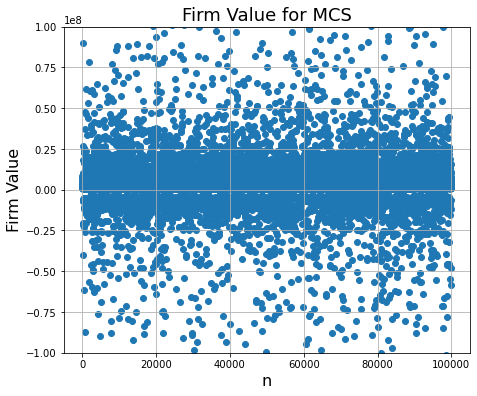

In [13]:
import numpy as np
from scipy.special import erf, fresnel
import matplotlib.pyplot as plt
#Standatd Monte Carlo Simulation
n = 100000
high_growth_mu = 0.1785
high_growth_sigma = 0.0634
stable_growth_mu = 0.0216
stable_growth_sigma = 0.0223
WACC_mu = 0.0855
WACC_sigma = 0.0223
EBIT2020 = 78499
Dep_2021 = 13459
CapEx_2021 = -40140
NWCT2021 = -2174
tax = 0.12
CF = [22081,34453,41757,78499]
CF1 = 22081
CF2 = 34453
CF3 = 41757
CF4 = 78499
numbers=[x for x in range(0,n)]
g_stable = np.random.normal(stable_growth_mu, stable_growth_sigma, n)
g_high = np.random.normal(high_growth_mu, high_growth_sigma, n)
WACC = np.random.normal(WACC_mu, WACC_sigma,n)



CF2021 = EBIT2020*(1+g_high)+Dep_2021-CapEx_2021-NWCT2021
print(CF2021)
Firmvalue1 = CF1/(1+WACC) + CF2/((1+WACC)**2) + CF3/((1+WACC)**3) + CF4/((1+WACC)**4) + CF2021/((WACC-g_stable)*(1+WACC)**4) 
print(Firmvalue1)


fig1 = plt.figure(figsize=(16,6))
axes1 = fig1.add_subplot(1, 2, 1)

axes1.set_xlabel("n", fontsize=16)
axes1.set_ylabel("Firm Value", fontsize=16)
axes1.set_title("Firm Value for MCS", fontsize=18)
axes1.grid()
plt.ylim(-100000000,100000000)
plt.scatter(numbers,Firmvalue1)
plt.show()




In [83]:
k_star = []
for i in Firmvalue1:
    k = np.log(i)
    if k< 100 :
        k_star.append(k)
lnV = np.std(k_star)
print(lnV)

0.6767783936610583


<ipython-input-83-3f338b21abb1>:3: RuntimeWarning: invalid value encountered in log
  k = np.log(i)


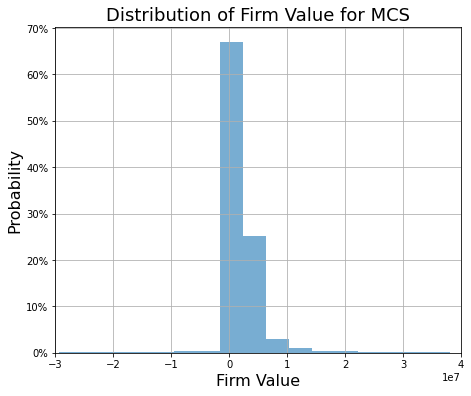

In [15]:

import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter

fig4 = plt.figure(figsize=(16,6))
axes4 = fig4.add_subplot(1, 2, 1)
plt.hist(Firmvalue1,bins =10000, histtype="bar", rwidth=1, alpha=0.6)
axes4.set_xlabel("Firm Value", fontsize=16)
axes4.set_ylabel("Probability", fontsize=16)
axes4.set_title("Distribution of Firm Value for MCS", fontsize=18)
axes4.grid()
plt.xlim([-30000000,40000000])
def to_percent(temp, position):
  return '%1.0f'%(10/10000*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.show()


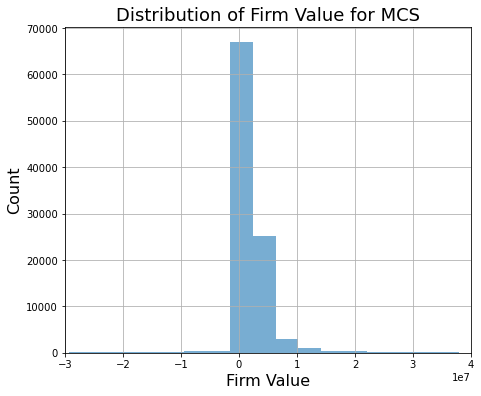

In [16]:

fig2 = plt.figure(figsize=(16,6))
axes2 = fig2.add_subplot(1, 2, 1)
plt.hist(Firmvalue1,bins =10000, histtype="bar", rwidth=1, alpha=0.6)
axes2.set_xlabel("Firm Value", fontsize=16)
axes2.set_ylabel("Count", fontsize=16)
axes2.set_title("Distribution of Firm Value for MCS", fontsize=18)
axes2.grid()
plt.xlim(-30000000,40000000)
plt.show()

In [72]:

Std = np.std(Firmvalue1)
Mean = np.mean(Firmvalue1)
print(Std)
print(Mean)


132762178.88321455
1670703.0579530476


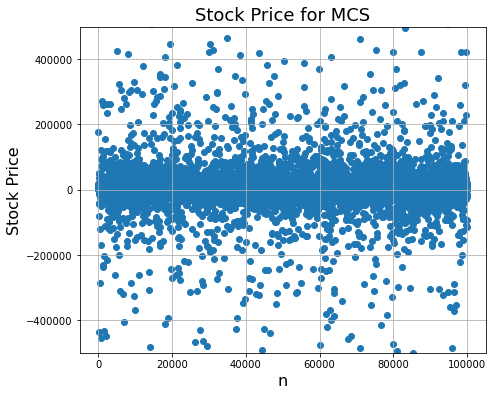

In [25]:
outstandingshares = 510
Stockprice = Firmvalue1/outstandingshares
fig3 = plt.figure(figsize=(16,6))
axes3 = fig3.add_subplot(1, 2, 1)
#axes1.plot(numbers, Firmvaluereal, 'b')
axes3.set_xlabel("n", fontsize=16)
axes3.set_ylabel("Stock Price", fontsize=16)
axes3.set_title("Stock Price for MCS", fontsize=18)
axes3.grid()
plt.ylim(-500000,500000)
plt.scatter(numbers,Stockprice)
plt.show()


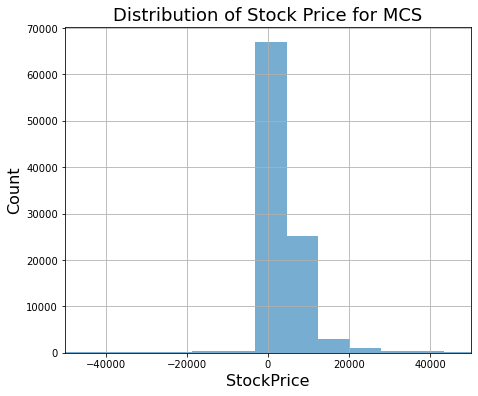

In [33]:

fig6 = plt.figure(figsize=(16,6))
axes6 = fig6.add_subplot(1, 2, 1)
plt.hist(Stockprice,bins =10000, histtype="bar", rwidth=1, alpha=0.6)
axes6.set_xlabel("StockPrice", fontsize=16)
axes6.set_ylabel("Count", fontsize=16)
axes6.set_title("Distribution of Stock Price for MCS", fontsize=18)
axes6.grid()
plt.xlim(-50000,50000)
plt.show()

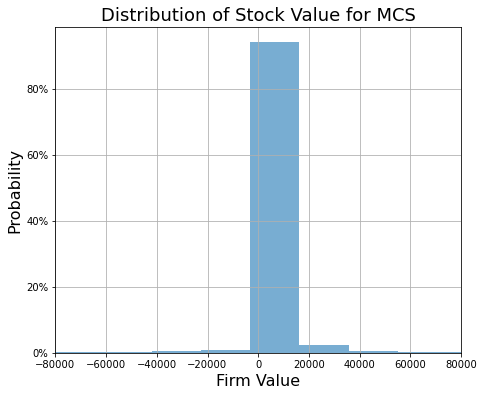

In [35]:
fig5 = plt.figure(figsize=(16,6))
axes5 = fig5.add_subplot(1, 2, 1)
plt.hist(Stockprice,bins =4000, histtype="bar", rwidth=1, alpha=0.6)
axes5.set_xlabel("Firm Value", fontsize=16)
axes5.set_ylabel("Probability", fontsize=16)
axes5.set_title("Distribution of Stock Value for MCS", fontsize=18)
axes5.grid()
plt.xlim([-80000,80000])
def to_percent(temp, position):
  return '%1.0f'%(10/10000*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.show()

In [39]:
Std = np.std(Stockprice)
Mean = np.mean(Stockprice)
for Stcokprice in range(2000,5000):
    Max = max(Stockprice)
    Min = min(Stockprice)
print(Std)
print(Mean)
print(Max)
print(Min)

260317.99781022462
3275.8883489275445
17861360.030743897
-59810545.12420171


In [84]:
import math
#Black-Scholes
S = 1686027
K = 17017
t = 6
r = 0.0319
sigama = lnV
sigama_square = lnV**2
d_1 = (np.log(S/K)+(r + sigama_square/2)*t)/(sigama*np.sqrt(t))
d_2 = d_1 -sigama*np.sqrt(t)
print(d_1)
print(d_2)
N_d1 =1
N_d2 = 1
C = S*N_d1 - K*math.e**(-r*t)*N_d2
print(C)
StockPrice_BS = C/510
print(StockPrice_BS)

3.7167007577044173
2.0589390242943795
1671974.3239422182
3278.3810273376826


<BarContainer object of 5 artists>

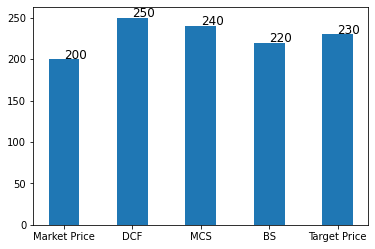

In [58]:
a = 'Market Price'
b = 'DCF'
c = 'MCS'
d = 'BS'
e = 'Target Price'
x = (a,b,c,d,e)
y = (200,250,240,220,230)

for index,data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=12))

plt.bar(x,y, width = 0.45)


In [ ]:
a = 'Market Price'
b = 'DCF'
c = 'MCS'
d = 'BS'
e = 'Target Price'
x = (a,b,c,d,e)
y = (200,250,240,220,230)

for index,data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=12))

plt.bar(x,y, width = 0.45)